In [6]:
from random import sample
import pickle as pk
import sys
sys.path.append("..")

import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Crippen import MolLogP, MolMR
from contextSub.util import get_substructs
from tqdm.notebook import tqdm
import seaborn as sns

## Sample 100 molecules from ChEMBL with 10-22 filtered PubChem substructures

In [11]:
chembl_smiles = pd.read_csv("../contextSub/dataset/chembl/processed.not_filtered/smiles.csv", header=None)

In [31]:
chembl_mols = [Chem.MolFromSmiles(smiles) for smiles in chembl_smiles[0]]
sampled_mols = sample(chembl_mols, 10000)

In [32]:
sub_len = []
pattern_path = "../contextSub/resources/pubchemFPKeys_to_SMARTSpattern_filtered.csv"
for mol in tqdm(sampled_mols):
    sub_len.append(len(get_substructs(mol, pattern_path)))

  0%|          | 0/10000 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

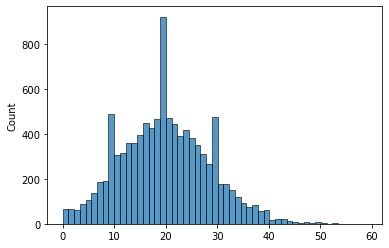

In [35]:
sns.histplot(sub_len)

In [36]:
eval_mols = []
counter = {18:0, 19:0, 20:0, 21:0, 22:0}

In [37]:
pb = tqdm(total=100)
for mol in sampled_mols:
    subl = len(get_substructs(mol, pattern_path))
    if subl in counter and counter[subl] < 20:
        counter[subl] += 1
        pb.update(1)
        eval_mols.append(mol)
    if all([val == 20 for val in counter.values()]):
        break

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
eval_smiles = [Chem.MolToSmiles(mol, isomericSmiles=True) for mol in eval_mols]

In [42]:
eval_len = []
for mol in tqdm(eval_mols):
    eval_len.append(len(get_substructs(mol, pattern_path)))

  0%|          | 0/100 [00:00<?, ?it/s]

<AxesSubplot:ylabel='Count'>

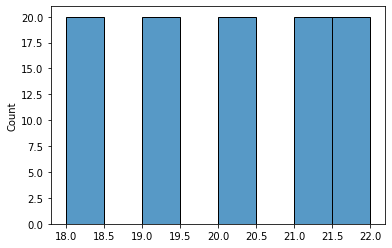

In [43]:
sns.histplot(eval_len)

In [45]:
with open("../contextSub/resources/eval_smiles.pk", "wb") as f:
    pk.dump(eval_smiles, f)

## Label the sampled molecules based on their properties

In [3]:
with open("../contextSub/resources/eval_smiles.pk", "rb") as f:
    molecules = pk.load(f)

In [10]:
logPs = [MolLogP(Chem.MolFromSmiles(mol)) for mol in molecules]

In [11]:
mrs = [MolMR(Chem.MolFromSmiles(mol)) for mol in molecules]

<AxesSubplot:ylabel='Count'>

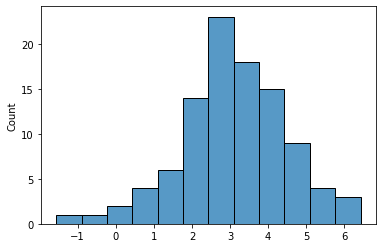

In [12]:
sns.histplot(logPs)

<AxesSubplot:ylabel='Count'>

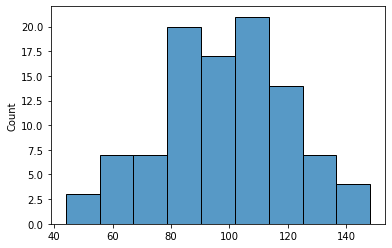

In [13]:
sns.histplot(mrs)

In [14]:
mols_prop = {}
for smi, logp, mr in zip(molecules, logPs, mrs):
    mols_prop[smi] = {"log_p": logp, "mr": mr}

In [17]:
with open("resources/eval_smiles_props.pk", "wb") as f:
    pk.dump(mols_prop, f)